# 1. Import Necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
delivery_time_data=pd.read_csv('delivery_time.csv')
delivery_time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3. Data Understanding

In [3]:
delivery_time_data.shape

(21, 2)

In [4]:
delivery_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

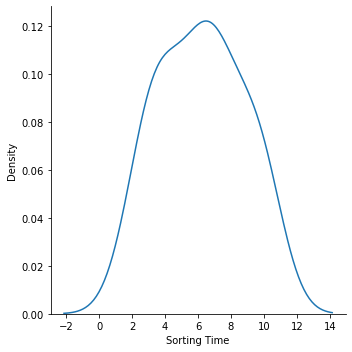

In [6]:
sns.displot(data=delivery_time_data,
    x='Sorting Time',kind='kde')

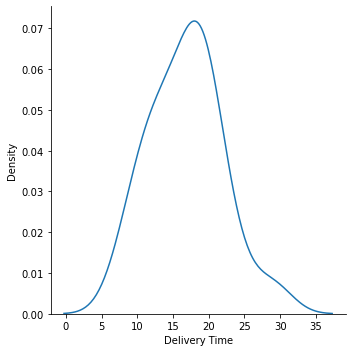

In [7]:
sns.displot(data=delivery_time_data,
    x='Delivery Time',kind='kde')

#  4.Feature Engineering

In [8]:
delivery_time_data=delivery_time_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery_time_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# 5.Correlation Analysis

In [9]:
delivery_time_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


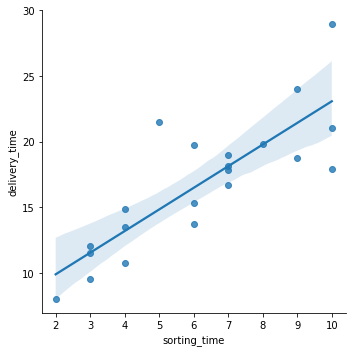

In [10]:
sns.lmplot( x='sorting_time',
    y='delivery_time',data=delivery_time_data)

# 6.Model Building

###  model_1

In [11]:
import statsmodels.formula.api as smf

In [12]:
model_1=smf.ols("delivery_time~sorting_time",data=delivery_time_data).fit()


In [13]:
model_1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
model_1.rsquared , model_1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [15]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        22:53:03   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### in model_1 R-squared:	0.682


### model_2

In [16]:
model_2=smf.ols("delivery_time~np.log(sorting_time)",data=delivery_time_data).fit()

In [17]:
model_2.rsquared , model_2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [18]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        22:53:03   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7.Model Predictions

In [20]:
# Manual prediction for sorting time 8,10,25
delivery_time1 = (6.582734) + (1.649020)*(8)
delivery_time2 = (6.582734) + (1.649020)*(10)
delivery_time3 = (6.582734) + (1.649020)*(25)
print(delivery_time1)
print(delivery_time2)
print(delivery_time3)


19.774894
23.072933999999997
47.808234


In [21]:
# Automatic Prediction for say sorting time 8,10,25
new_data=pd.Series([8,10,25])
new_data

0     8
1    10
2    25
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,10
2,25


In [23]:
model_1.predict(data_pred)

0    19.774893
1    23.072933
2    47.808231
dtype: float64

In [24]:
model_2.predict(data_pred)

0    19.964933
1    21.982913
2    30.269308
dtype: float64

#  ===============================================================

# Import Data

In [26]:
Salary_Data=pd.read_csv('Salary_Data.csv')
Salary_Data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Understanding

In [27]:
Salary_Data.shape

(30, 2)

In [28]:
Salary_Data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [29]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

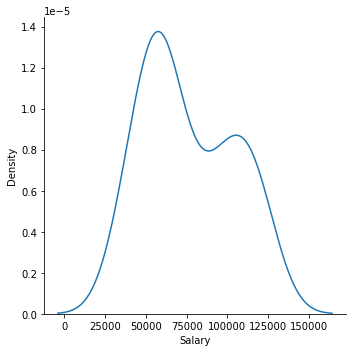

In [30]:
sns.displot( data=Salary_Data,x='Salary', kind='kde')

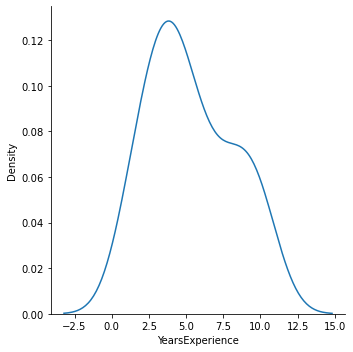

In [31]:
sns.displot( data=Salary_Data,x='YearsExperience', kind='kde')

# Correlation Analysis

In [32]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


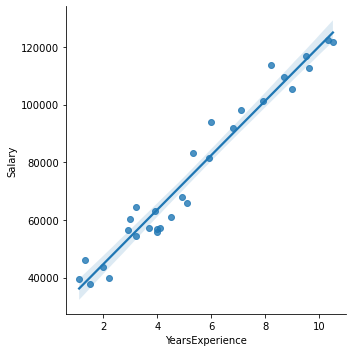

In [33]:
sns.lmplot( x='YearsExperience',
    y='Salary',
    data=Salary_Data)

# Model Building

In [34]:
model=smf.ols("Salary~YearsExperience",data=Salary_Data).fit()

In [35]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [37]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

# Model Predictions

In [38]:
#  prediction for say 5 Years Experience
Salary1 = (25792.200199) + (9449.962321)*(5)
Salary1


73042.01180400001

In [39]:
#prediction for say 8 Years Experience
Salary2 = (25792.200199) + (9449.962321)*(8)
Salary2

101391.898767

####  Automatic Prediction

In [40]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,8


In [ ]:
model.predict(data_pred)